In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.fft import fft2, fftshift, dct

In [3]:
img = cv2.imread('vehicle_plate.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

height, width = img_gray.shape
front_plate = img_gray[:height//2, :]
back_plate = img_gray[height//2:, :]

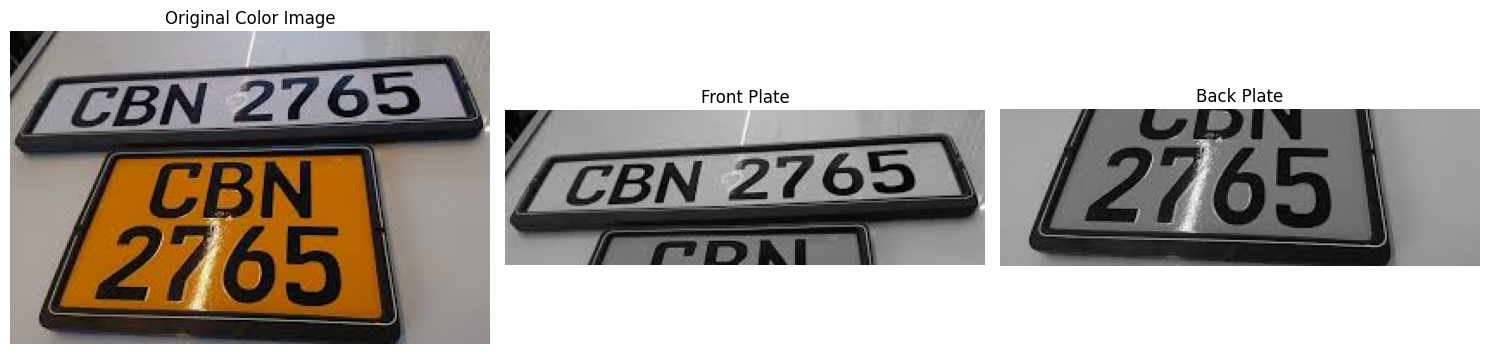

In [13]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title('Original Color Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(front_plate, cmap='gray')
plt.title('Front Plate')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(back_plate, cmap='gray')
plt.title('Back Plate')
plt.axis('off')

plt.tight_layout()
plt.show()

In [5]:
fft_front = fft2(front_plate)
fft_back = fft2(back_plate)

fft_front_shift = fftshift(fft_front)
fft_back_shift = fftshift(fft_back)

magnitude_front = np.log(np.abs(fft_front_shift) + 1)
magnitude_back = np.log(np.abs(fft_back_shift) + 1)

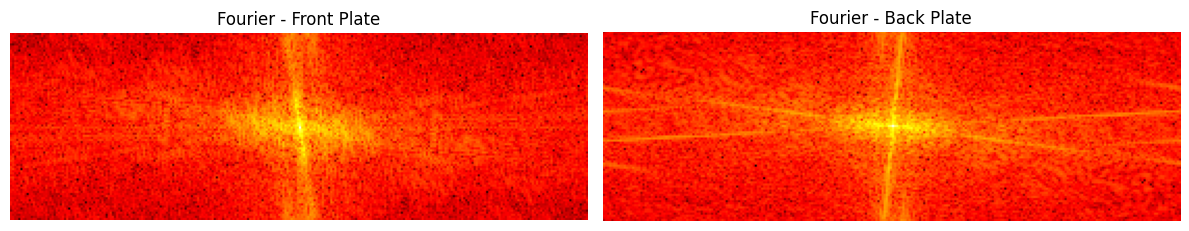

In [6]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(magnitude_front, cmap='hot')
plt.title('Fourier - Front Plate')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_back, cmap='hot')
plt.title('Fourier - Back Plate')
plt.axis('off')

plt.tight_layout()
plt.show()

In [7]:
dct_front = cv2.dct(np.float32(front_plate))
dct_back = cv2.dct(np.float32(back_plate))

dct_front_log = np.log(np.abs(dct_front) + 1)
dct_back_log = np.log(np.abs(dct_back) + 1)

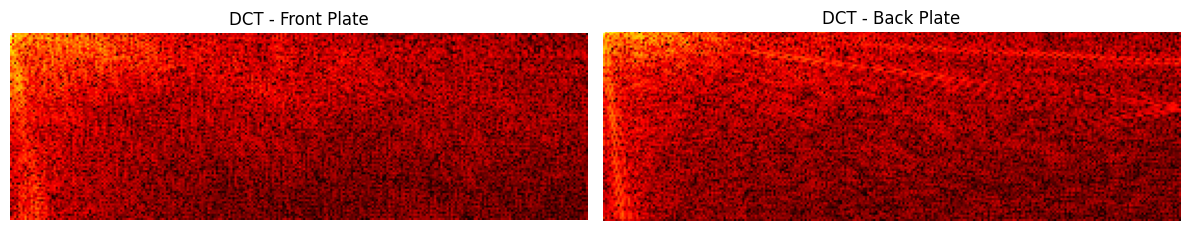

In [8]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(dct_front_log, cmap='hot')
plt.title('DCT - Front Plate')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dct_back_log, cmap='hot')
plt.title('DCT - Back Plate')
plt.axis('off')

plt.tight_layout()
plt.show()

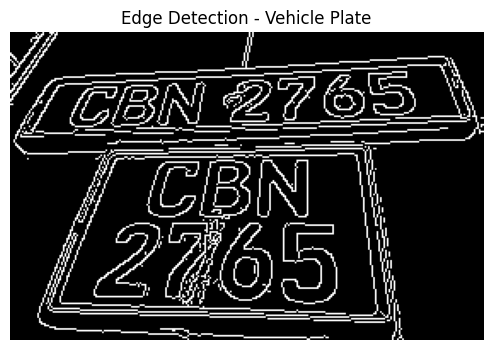

In [9]:
edges = cv2.Canny(img_gray, 50, 150)

plt.figure(figsize=(10, 4))
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection - Vehicle Plate')
plt.axis('off')
plt.show()

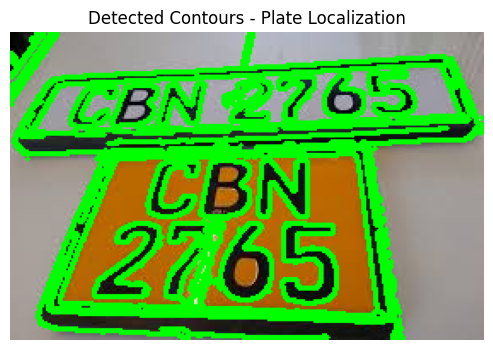

In [10]:
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img_contours = img_rgb.copy()
cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 2)

plt.figure(figsize=(10, 4))
plt.imshow(img_contours)
plt.title('Detected Contours - Plate Localization')
plt.axis('off')
plt.show()

In [11]:
print("Fourier Transform Analysis:\n"
      "- Reveals frequency content and image patterns\n"
      "- Bright spots indicate strong periodic components\n"
      "- Useful for noise reduction and compression\n\n"

      "DCT Analysis:\n"
      "- Concentrates energy in top-left corner\n"
      "- Efficient for image compression (JPEG)\n"
      "- Preserves important visual information\n\n"

      "Traffic Optimization Applications:\n"
      "- Automated number plate recognition\n"
      "- Traffic flow monitoring and analysis\n"
      "- Vehicle counting and classification\n"
      "- Peak hour traffic pattern analysis\n"
      "- Route optimization based on vehicle density\n")

Fourier Transform Analysis:
- Reveals frequency content and image patterns
- Bright spots indicate strong periodic components
- Useful for noise reduction and compression

DCT Analysis:
- Concentrates energy in top-left corner
- Efficient for image compression (JPEG)
- Preserves important visual information

Traffic Optimization Applications:
- Automated number plate recognition
- Traffic flow monitoring and analysis
- Vehicle counting and classification
- Peak hour traffic pattern analysis
- Route optimization based on vehicle density

